# Projet d'économétrie

## Partie 1. Régression

### Question 1

In [1]:
load MROZ.RAW

% Le salaire est nul après la 428ème observation
S=MROZ(1:428,:);

On observe que seules les 428 premières observations sont strictement positives pour la variable wage. Comme demandé, on ne prendra en compte que ces observations.

### Question 2

###### a) Pour l'ensemble des femmes

In [2]:
X = ['.           ','moyenne  ecart-type   variance   max   min'];
disp(X)

wage = S(:,7);
moyW = mean(wage);
ecarW = std(wage);
varW = var(wage);
maxW = max(wage);
minW = min(wage);


X1 = ['Salaire:    ', num2str(moyW),'     ', num2str(ecarW),'      ', num2str(varW),'    ', num2str(maxW), '    ', num2str(minW)];
disp(X1)

age = S(:,5);
moyA = mean(age);
ecarA = std(age);
varA = var(age);
maxA = max(age);
minA = min(age);

X2 = ['Age:        ', num2str(moyA), '     ', num2str(ecarA), '      ', num2str(varA),'   ', num2str(maxA), '    ', num2str(minA)];
disp(X2)

educ = S(:,6);
moyE = mean(educ);
ecarE = std(educ);
varE = var(educ);
maxE = max(educ);
minE = min(educ);

X3 = ['Education:  ', num2str(moyE), '    ', num2str(ecarE), '      ', num2str(varE),'    ', num2str(maxE), '    ', num2str(minE)];
disp(X3)

.           moyenne  ecart-type   variance   max   min
Salaire:    4.1777     3.3103      10.958    25    0.1282
Age:        41.972     7.7211      59.6151   60    30
Education:  12.6589    2.2854      5.2229    17    5


##### b) Femmes dont le salaire du mari est supérieur à la médiane de l'échantillon

In [3]:
%%Le salaire des mari est placé colonne 12
med = median(S(:,12));

S2 = S((S(:,12)>med),:);

disp(X)

wage2 = S2(:,7);
moyW2 = mean(wage2);
ecarW2 = std(wage2);
varW2 = var(wage2);
maxW2 = max(wage2);
minW2 = min(wage2);

X4 = ['Salaire:    ', num2str(moyW2),'     ', num2str(ecarW2),'      ', num2str(varW2),'   ', num2str(maxW2), '    ', num2str(minW2)];
disp(X4)

age2 = S2(:,5);
moyA2 = mean(age2);
ecarA2 = std(age2);
varA2 = var(age2);
maxA2 = max(age2);
minA2 = min(age2);

X5 = ['Age:        ', num2str(moyA2), '    ', num2str(ecarA2), '      ', num2str(varA2),'    ', num2str(maxA2), '    ', num2str(minA2)];
disp(X5)

educ2 = S2(:,6);
moyE2 = mean(educ2);
ecarE2 = std(educ2);
varE2 = var(educ2);
maxE2 = max(educ2);
minE2 = min(educ2);
 
X6 = ['Education:  ', num2str(moyE2), '     ', num2str(ecarE2), '       ', num2str(varE2),'    ', num2str(maxE2), '    ', num2str(minE2)];
disp(X6)

.           moyenne  ecart-type   variance   max   min
Salaire:    4.8968     4.0416      16.3346   25    0.1616
Age:        42.2757    7.3888      54.595    59    30
Education:  13.243     2.359       5.5651    17    5


##### C) Femmes dont le salaire du mari est inférieur à la médiane de l'échantillon

In [4]:
S3 = S((S(:,12)<med),:);

X = ['.           ','moyenne  ecart-type   variance   max      min'];
disp(X)

wage3 = S3(:,7);
moyW3 = mean(wage3);
ecarW3 = std(wage3);
varW3 = var(wage3);
maxW3 = max(wage3);
minW3 = min(wage3);

X7 = ['Salaire:    ', num2str(moyW3),'     ', num2str(ecarW3),'      ', num2str(varW3),'    ', num2str(maxW3), '   ', num2str(minW3)];
disp(X7)

age3 = S3(:,5);
moyA3 = mean(age3);
ecarA3 = std(age3);
varA3 = var(age3);
maxA3 = max(age3);
minA3 = min(age3);

X8 = ['Age:        ', num2str(moyA3), '    ', num2str(ecarA3), '      ', num2str(varA3),'   ', num2str(maxA3), '       ', num2str(minA3)];
disp(X8)

educ3 = S3(:,6);
moyE3 = mean(educ3);
ecarE3 = std(educ3);
varE3 = var(educ3);
maxE3 = max(educ3);
minE3 = min(educ3);

X9 = ['Education:  ', num2str(moyE3), '    ', num2str(ecarE3), '      ', num2str(varE3),'    ', num2str(maxE3), '       ', num2str(minE3)];
disp(X9)

.           moyenne  ecart-type   variance   max      min
Salaire:    3.4585     2.1433      4.5936    18.267   0.1282
Age:        41.6682    8.0455      64.7298   60       30
Education:  12.0748    2.0542      4.2197    17       6


Les statistiques descriptives sur l’âge et les années d’éducation sont globalement toutes similaires suivant les catégories.
En revanche, on voit apparaître un salaire moyen plus élevé mais avec un écart-type aussi plus important pour les femmes dont le mari est au-dessus de la médiane, par rapport à celles dont le mari est en-dessous de la médiane.

### Question 3

In [5]:
wage = S(:,7);
lwage = log(S(:,7));

#### &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; Histogramme de la variable wage

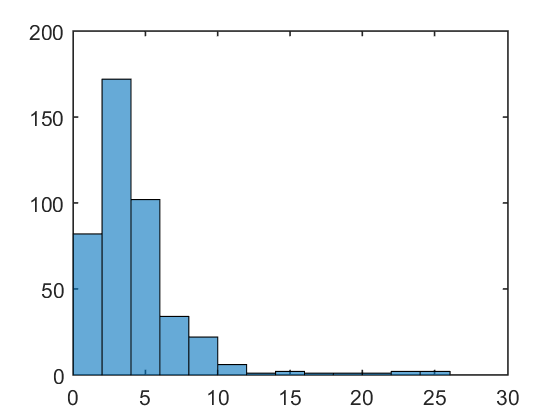

In [6]:
histogram(wage)

#### &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; Histogramme de la variable lwage

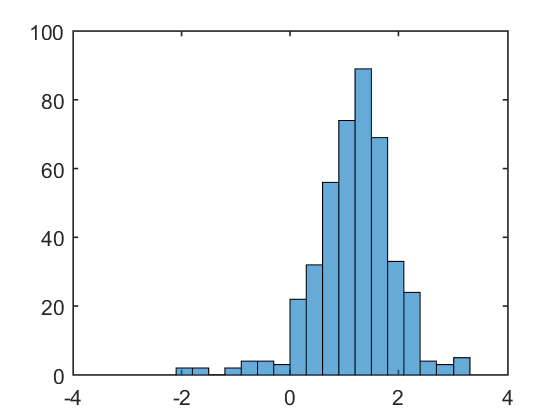

In [7]:
histogram(lwage)

On remarque que la variable lwage approche la forme d’une loi gaussienne, ce qui correspond au cas linéaire classique. Nous utiliserons donc cette variable pour la suite.

### Question 4

Nous souhaitons déterminer les corrélations motheduc et fatheduc avec la variable wage, présents aux colonnes 15 et
16 du fichier MROZ.raw

In [8]:
%Corrélation motheduc sur le salaire

corMotheduc = corrcoef(S(:,7),S(:,15))

%Corrélation fatheduc sur le salaire

corFatheduc = corrcoef(S(:,7),S(:,16))



corMotheduc =

    1.0000    0.0571
    0.0571    1.0000


corFatheduc =

    1.0000    0.1077
    0.1077    1.0000


L'influence de l'éducation de père semble plus forte que celle de la mère cependant il y a problème de multicolinéarité 
car probablement, plus la mère est éduquée plus le père est éduqué et inversement. <br>
<br>

On calcul la corrélation entre motheduc et fatheduc:

In [9]:
cor_Motheduc_Fatheduc = corrcoef(S(:,16),S(:,15))

cor_Motheduc_Fatheduc =

    1.0000    0.5541
    0.5541    1.0000


On constate effectivement une corrélation, il y a donc problème de multicolinéarité. 

### Question 5

##### a) Graphique entre wage et educ

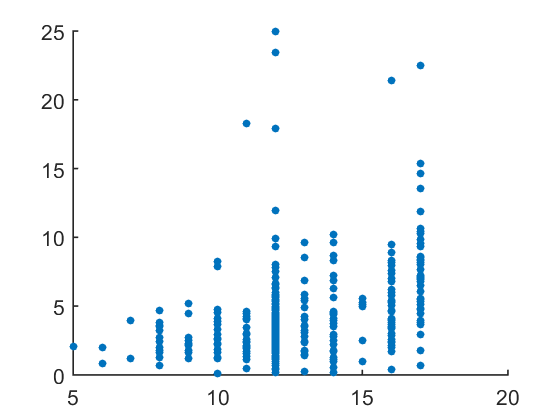

In [10]:
scatter(S(:,6),S(:,7), 15, 'filled')

#### &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; Evolution de la variable wage en fonction de educ

On voit tout d’abord que quelque soit l'education, le salaire minimum à peu près similaire. En revanche plus le nombre d’années d’éducation est élevé, plus on atteint un salaire maximum et une moyenne élevés mais également une grande disparité dans les salaires.
Donc l'évolution du salaire est linéaire avec un écart-type qui augmente avec l'éducation.

##### b) Graphique entre wage et expr

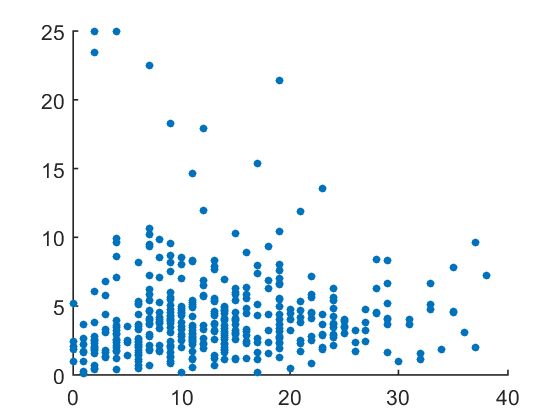

In [11]:
scatter(S(:,19),S(:,7), 15, 'filled')

#### &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; Evolution de la variable wage en fonction de exper

Ici malgré quelques "abérrations" on constate une légère pente positive, donc plus on a de l'expérience plus haut est le salaire. Mais l'influence de l'expérience semble bien plus faible que celle de l'éducation.

##### c) Graphique entre wage et fatheduc

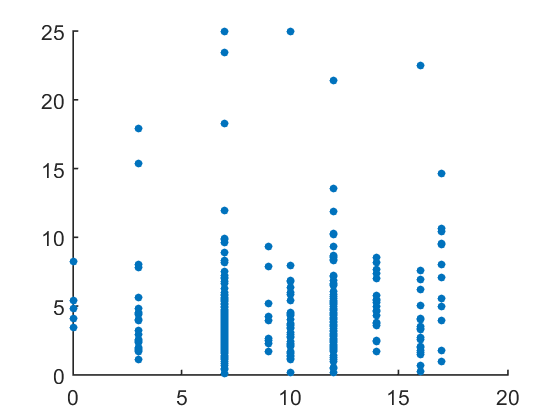

In [12]:
scatter(S(:,16),S(:,7), 15, 'filled')

#### &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; Evolution de la variable wage en fonction de fatheduc

Ici on ne constate pas de corrélation évidente. <br>
<br>

Ces graphiques ne sont pas obtenus "toute chose égale par ailleurs". En effet pour chacune de ces observations les autres variables ne sont pas fixées et peuvent varier fortement. 
Pour un même salaire et une même education, on peut avoir des variables fatheduc et expr différentes par exemple. 

### Question 6

L’hypothèse fondamentale qui garantit un estimateur des moindres carrés non biaisé est la suivante : aucune des variables ne doit être corrélée avec le terme de résidus (c'est à dire que la variable doit être exogène) et il n’y a pas de multi-colinéarité exacte entre les variables.

En considérant un modèle classique y = x.b + e, il y a un biais de variable omise s’il existe une variable qui est corrélée avec x mais aussi y. On doit ceci à un manque de données en général.

### Question 7

In [13]:
wage = S(:,7);
city = S(:,18);
educ = S(:,6);
expr = S(:,19);
nwifeinc = S(:,20);
kidslt6 = S(:,3);
kidsge6 = S(:,4);

y=wage;
[n,K] = size(S);
X=[ones(n,1), city, educ, expr, nwifeinc, kidslt6, kidsge6];

beta=inv(X'*X)*X'*y;
u=y-X*beta;

Histogramme des résidus de la régréssion de wage avec les variables explicatives city, educ, exper, nwifeinc, kidslt6, kidsge6. 

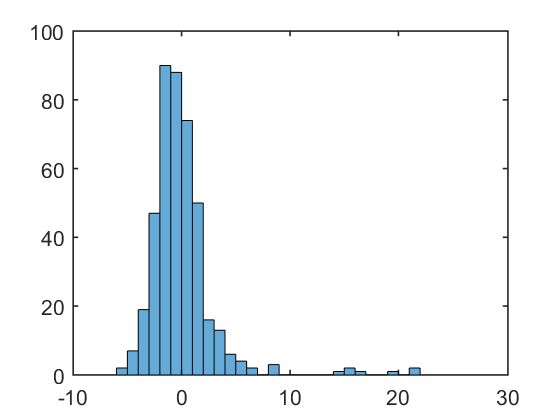

var_residus =

    9.5640


In [14]:
histogram(u)
var_residus = var(u)

L’histogramme est dissymétrique et la variance très grande. On ne peut donc pas assimiler wage à une loi de gaussienne centrée en 0.

### Question 8

In [15]:
y1=log(wage);
[n,K] = size(S);
X1=[ones(n,1), city, educ, expr, nwifeinc, kidslt6, kidsge6];

beta1=inv(X1'*X1)*X1'*y1;
u1=y1-X1*beta1;

Histogramme des résidus de la régréssion de lwage avec les variables explicatives city, educ, exper, nwifeinc, kidslt6, kidsge6. 

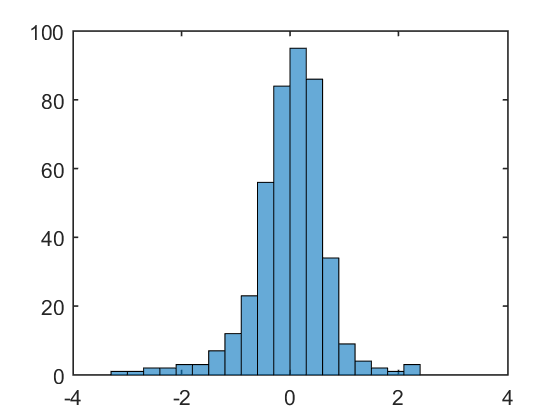

var_residus =

    0.4417


In [16]:
histogram(u1)
var_residus = var(u1)

La variance de l’histogramme des résidus est cette fois de 0.44, ce qui est bien plus faible que précédemment. L’histogramme est symétrique, on peut assimiler la variable lwage à une gaussienne centrée.

### Question 9

In [17]:
lwage = log(wage);

Testons l’hypothèse de non significativité de exper avec des seuils de significativité de 1%, 5% et 10% à l’aide d’un test de Student. 

Le test de Student se résume à : <br>
&nbsp; - Hypothèse 0 : BetaExper = 0 <br>
&nbsp; - Hypothèse 1 : BetaExper != 0 <br>

In [18]:
% H0: BetaExpr = 0

y=lwage;
[n,K] = size(S);
X=[ones(n,1), city, educ, expr, nwifeinc, kidslt6, kidsge6];

beta=inv(X'*X)*X'*y;
u=y-X*beta;

sig2=u'*u/(n-7); 
std=sqrt(diag(sig2*inv(X'*X)));

t=beta./std;

Exper est le 4ème paramètre:

In [19]:
% expr est en paramètre 4:
disp(['t(4) = ', num2str(t(4))])

t(4) = 3.4517


##### Seuil à 1%

In [20]:
disp(['tdis = ', num2str(tdis_inv(0.99, 421))])

tdis = 2.3352


Ici 3,5>2,3 on est donc à droite <br>
-> On rejette l'hypothèse à 1% <br>
-> betaExpr est différent de 0 <br>

##### Seuil à 5%

In [21]:
disp(['tdis = ', num2str(tdis_inv(0.95, 421))])

tdis = 1.6485


Ici 3,5>1,6 on est donc à droite <br>
-> On rejette l'hypothèse à 5% <br>
-> betaExpr est différent de 0 <br>

##### Seuil à 10%

In [22]:
disp(['tdis = ', num2str(tdis_inv(0.90, 421))])

tdis = 1.2836


Ici 3,5>1,3 on est donc à droite <br>
-> On rejette l'hypothèse à 10% <br>
-> betaExpr est différent de 0 <br>

On rejette l'hypothèse dans les trois cas. Donc BetaExper est significaivement non nul à ces seuils de significativité.

### Question 10

Testons désormais l’hypothèse selon laquelle le coefficient associé à educ est égal à 10% avec un seuil de significativité de 5% à l’aide encore une fois d’un test de Student.

(On va en fait tester que BetaEduc-0,1 = 0)

In [23]:
% H0: BetaExpr = 10%
t=(beta-0.1)./std;

Educ est en 3ème paramètre:

In [24]:
disp(['t(3) = ', num2str(t(3))])
disp(['tdis = ', num2str(tdis_inv(0.95, 428))])

t(3) = 0.14883
tdis = 1.6484


Ici 1,6>0,15 on est donc à gauche <br>
-> On accepte l'hypothèse à 5% <br>

### Question 11

Hypothèse: <br>
&emsp; betaEduc = 0,1 <br>
&emsp; betaExpr = 0,05

On réalise on test de Fisher: <br>
<br>
Modèle non contraint : le même que pour la question 8 <br>
Modèle contraint : y' = y - 0.05*expr - 0.1*educ <br>
<br>
Nombre de contraintes = 2

##### Modèle non contraint:

In [25]:
y0=lwage;
[n,K] = size(S);
X0=[ones(n,1), city, educ, expr, nwifeinc, kidslt6, kidsge6];

beta0=inv(X0'*X0)*X0'*y0;
u0=y0-X0*beta0;

ssr0=u0'*u0

ssr0 =

  188.5900


##### Modèle contraint:

In [26]:
y1 =  y0 - 0.05*expr - 0.1*educ;
X1 = [ones(n,1), city, nwifeinc, kidslt6, kidsge6];

beta1 = inv(X1'*X1)*X1'*y1;
u1 = y1-X1*beta1;

ssr1 = u1'*u1

ssr1 =

  215.0918


##### Test de Fisher: <br>

F = ((ssr1 - ssr0)/nbContraintes)/(ssr0/(nbDegréLibertéNonContraint))

In [27]:
F = ((ssr1 - ssr0)/2)/(ssr0/(421))
%p valeur
p_value = fdis_prb(F,2,421)

F =

   29.5808


p_value =

   9.5355e-13


On rejette l'hypothèse jointe (c'est l'exerience professionnelle qui fait rejetter l'hypothèse car proche de 1,5%)

### Question 12

In [28]:
betaExper = beta0(4)

betaExper =

    0.0155


Une année d'espérience augmente de 1,5% le salaire, 10 années d'expérience augmentent donc le salaire de 15%

### Question 13

On réalise un test de fisher pour tester l'égalité des coefficients associés aux variables kidslt6 et kidsge6

##### Modèle non contraint:

Toujours le même:

In [29]:
ssr0=u0'*u0

ssr0 =

  188.5900


##### Modèle contraint:

In [30]:
y1 = lwage;
X1 = [ones(n,1), city, educ, expr, nwifeinc, kidslt6+kidsge6];
beta1 = inv(X1'*X1)*X1'*y1;
u1 = y1 - X1*beta1;
ssr1 = u1'*u1

ssr1 =

  188.6519


##### Test de Fisher:<br>
F = ((ssr1 - ssr0)/1)/(ssr0/(421))

In [31]:
F = ((ssr1 - ssr0)/1)/(ssr0/(421))
p_value = fdis_prb(F,1,421)

F =

    0.1382


p_value =

    0.7103


On accepte l'hypothèse.

### Question 14

On réalise un test d'hétéroscédasticité de forme linéaire.

On réalise un test de Fisher: <br>

Modele utilisé: u2 = delta0 + delta*X + mu <br>
Avec u2 le carré des résidus

Ho : delta1 = delta2 = delta3 = 0

Modèle non contraint:

In [40]:
y = wage;
X = [ones(n,1), city, educ, expr, nwifeinc, kidslt6, kidsge6];
[n,k] = size(X);

beta = inv(X'*X)*X'*y;
u = y-X*beta;

u2 = u.^2;
%u2 est la variance empirique !

delta = inv(X'*X)*X'*u2;
residu = u2 - X*delta;

ssr0 = residu'*residu

ssr0 =

   7.5618e+05


Modèle contraint:

In [41]:
uc = u2;
Xc = ones(n,1);
delta = inv(Xc'*Xc)*Xc'*uc;
residuc = uc - Xc*delta;
ssrc = residuc'*residuc

ssrc =

   7.7335e+05


Fisher:

In [42]:
F = ((ssrc - ssr0)/6)/(ssr0/(421))
%on utilise fdis_prb(F, nbcontraintes, n-k), pour trouver la p-value
p_value = fdis_prb(F,6,421)

F =

    1.5926


p_value =

    0.1477


On accepte l'hypothèse selon laquelle les paramètres n'influent pas la variance, il y a homoscédasticité.

On regarde la statistique de student de chaque variable

In [43]:
sig2 = residu'*residu/(n-k);
std = sqrt(diag(sig2*inv(X'*X)));
t = delta./std

t =

    0.7278
    2.1472
    9.9779
   33.5824
   45.2405
    1.7664
    5.5924


On va donc corriger le modèle par rapport à la variable dont la statistique de student est la plus élevée, ici la 5ème variable, qui est nwifeinc (revenu de la famille hormis celui de la femme)<br>
<br>
On va alors diviser toutes les variable par l'écart-type de la variable nwifeinc et afficher les nouveaux écarts-types.

In [36]:
Y_corrige = y./sqrt(nwifeinc);
X_corrige = [ones(n,1)./sqrt(nwifeinc), city./sqrt(nwifeinc), educ./sqrt(nwifeinc), expr./sqrt(nwifeinc), nwifeinc./sqrt(nwifeinc), kidslt6./sqrt(nwifeinc), kidsge6./sqrt(nwifeinc)];
beta = inv(X_corrige'*X_corrige)*X_corrige'*Y_corrige;
u = Y_corrige-X_corrige*beta;

[n,k]=size(X_corrige);

u2 = u.^2;

delta = inv(X_corrige'*X_corrige)*X_corrige'*u2;
residu = u2 - X*delta;

SSR = residu'*residu

q=6;
uc = u2;
Xc = ones(n,1)./sqrt(nwifeinc);
deltac = inv(Xc'*Xc)*Xc'*uc;
residuc = uc - Xc*deltac;
SSRc = residuc'*residuc
F = ((SSRc - SSR)/q)/(SSR/(n-k))
%on utilise fdis_prb(F, nbcontraintes, n-k), pour trouver la p-value
%fdis_prb(F,q,n-k)

SSR =

   3.7438e+03


SSRc =

   2.0752e+03


F =

  -31.2733


-> PB, lorsqu'on corrige me modèle on trouve un F négatif, il y a un problème quelque part.

### Question 15

On crée une nouvelle variable binaire à partir de la condidtion kidslt6 >= 2
On ne prend pas d'égalité stricte car dans nos observations, aucune femme ayant un salaire a strictement plus que 2 enfants de moins de 6 ans. 

In [62]:
q15 = ones(n,1);

for k=1:n

    if kidslt6(k) >= 2
        q15(k) = 1;
    else
        q15(k) = 0;
    end   
end

In [79]:
M6city = city.*q15;
M6educ = educ.*q15;
M6expr = expr.*q15;
M6nwifeinc = nwifeinc.*q15;
M6kidsge6 = kidsge6.*q15;

##### Modèle non contraint

In [80]:
y0=lwage;
[n,K] = size(S);
X0=[ones(n,1), city, M6city, educ, M6educ, expr, M6expr, nwifeinc, M6nwifeinc, kidslt6, kidsge6, M6kidsge6];

beta0=inv(X0'*X0)*X0'*y0;
u0=y0-X0*beta0;

ssr0=u0'*u0

ssr0 =

  187.7624


##### Modèle contraint

In [81]:
y1=lwage;
X1=[ones(n,1), city, educ, expr, nwifeinc, kidslt6, kidsge6];

beta1=inv(X1'*X1)*X1'*y1;

u1=y1-X1*beta1;

ssr1=u1'*u1

ssr1 =

  188.5900


##### Test de Fisher:<br>
<br>
F=((ssr1-ssr0)/6)/(ssr0/415);<br>
<br>
On perd 5 degré de liberté du modèle non contraint au modèle contraint car on fixe M6city = M6educM6expr = M6nwifein = M6kidsge6 = 0<br>
Dans le modèle non contraint on a 428 observation et 12 paramètres.

In [83]:
F=((ssr1-ssr0)/5)/(ssr0/416)
p_value = fdis_prb(F,5,416)

F =

    0.3667


p_value =

    0.8713


Selon la p_value, on rejette l'hypothèse d'une différence entre les femmes ayant plus ou moins de 2 enfants de moins de 6 ans.

### Question 16

On binarise les variables suivantes:<br>
 - 0 enfant de moins de 6ans (M6_0)<br>
 - 1 enfant de moins de 6ans (M6_1)<br>
 - 2 enfants de moins de 6ans (M6_2)<br>

In [93]:
M6_0 = ones(n,1);
M6_1 = ones(n,1);
M6_2 = ones(n,1);

for k=1:n

    if kidslt6(k) == 0
        M6_0(k) = 1;
        M6_1(k) = 0;
        M6_2(k) = 0;
        
    elseif kidslt6(k) == 1
        M6_0(k) = 0;
        M6_1(k) = 1;
        M6_2(k) = 0;
        
    else
        M6_0(k) = 0;
        M6_1(k) = 0;
        M6_2(k) = 1;
        
    end 
    
end

On refait la régression de lwage sur ces variable comme à la question 8 et on en fait l'histogramme des résidus. <br>
On fait donc la régression sur:
X=[ones(n,1), city, educ, expr, nwifeinc, kidsge6, M6_1, M6_2]<br>
On prend comme référnce les femme n'ayant pas d'enfant de moins de 6 ans (lorsqu'on rajoute M6_0 à la régression on a un gros problème de colinéarité et les resultats sont aberrants)


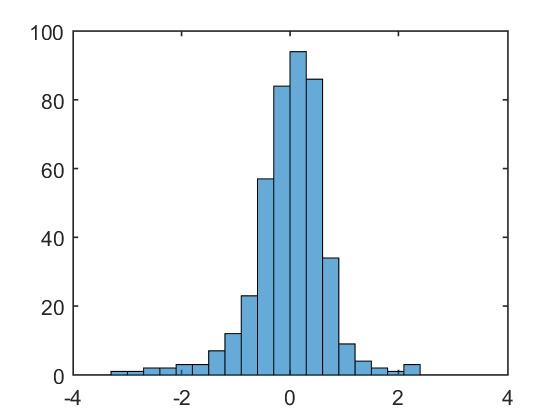

var_residus =

    0.4416


In [101]:
y=lwage;
[n,K] = size(S);
X=[ones(n,1), city, educ, expr, nwifeinc, kidsge6, M6_1, M6_2];

beta=inv(X'*X)*X'*y;
u=y-X*beta;

histogram(u)
var_residus = var(u)

Les catégories utilisées sont mutuellement exclusives, en effet on ne peut pas avoir 1 enfant de moins de 6 ans ET 2 enfants de moins de 6 ans.
En revanche on peut avoir 0, 1 ou 2 enfants de moins de 6 ans et des enfants de plus de 6 ans.

Les coefficients sont:

In [102]:
beta

beta =

   -0.3976
    0.0346
    0.1022
    0.0154
    0.0049
   -0.0116
   -0.0540
   -0.0650


Avoir 1 enfant de moins de 6 ans fait baisser le salaire de 5,4% et en avoir deux de 6,5% par rapport au fait de ne pas avoir d'enfants de moins de 6 ans.

##### Test de non significativité des variables binaires

Modèle non contraint:

In [103]:
ssr0=u'*u

ssr0 =

  188.5822


Modèle contraint:

In [104]:
y=lwage;
[n,K] = size(S);
X1=[ones(n,1), city, educ, expr, nwifeinc, kidsge6];

beta1=inv(X1'*X1)*X1'*y;
u1=y-X1*beta1;

ssr1=u1'*u1

ssr1 =

  188.7163


Test de Fisher:

In [106]:
F=((ssr1-ssr0)/2)/(ssr0/420)
p_value = fdis_prb(F,2,420)

F =

    0.1494


p_value =

    0.8613


On ne rejette pas l'hypothèse de non significativité des variables binaires. 

### Question 17<br>

Nous n'avons pas variables donnant une information sur l'âge des enfants et nous permettant de créer une variable binaire pour les femmes ayant des enfants de moins de 2 ans.

## Partie 2. Séries temporelles

### Question1
On importe le fichier VOLAT.RAW après avoir recodé les valeurs manquantes.

In [1]:
load VOLAT.RAW

### Question 2

On doit stationnariser les séries car la stationnarité est une hypothèse du théorème ergodique.

### Question 3

In [2]:
lsp500 = log(VOLAT(:,2));
pcsp = VOLAT(:,6);
div = VOLAT(:,3);
[n,k] =size(VOLAT);

##### Pour log(sp500):

In [3]:
lsp500_0 = lsp500(2:n);
lsp500_1 = lsp500(1:n-1);
d_lsp500 = lsp500_0 - lsp500_1; 
reso = ols(d_lsp500, lsp500_1)

reso = 

     meth: 'ols'
        y: [557x1 double]
     nobs: 557
     nvar: 1
     beta: 0.0013
     yhat: [557x1 double]
    resid: [557x1 double]
     sige: 0.0011
     bstd: 3.1774e-04
     bint: [6.6981e-04 0.0019]
    tstat: 4.0723
     rsqr: -0.0026
     rbar: -0.0026
       dw: 1.5083


Notre tstat est à droite de la tstat tabulée (-2,86) dans le cours (on fait un test à seul côté, à gauche) donc on accepte le test de racine unitaire. 

##### Pour pcsp:

In [3]:
pcsp_0 = pcsp(2:n);
pcsp_1 = pcsp(1:n-1);
d_pcsp = pcsp_0 - pcsp_1; 
reso = ols(d_pcsp, pcsp_1)

reso = 

     meth: 'ols'
        y: [557x1 double]
     nobs: 557
     nvar: 1
     beta: -1.0021
     yhat: [557x1 double]
    resid: [557x1 double]
     sige: 1.6894e+03
     bstd: 0.0041
     bint: [-1.0101 -0.9941]
    tstat: -244.9288
     rsqr: 0.9908
     rbar: 0.9908
       dw: 1.4534


Notre tstat est totalement à gauche de la tstat tabulée dans le cours donc on rejette le test de racine unitaire. 

##### Pour div:

In [4]:
div_0 = div(2:n);
div_1 = div(1:n-1);
d_div = div_0 - div_1; 
reso = ols(d_div, div_1)

reso = 

     meth: 'ols'
        y: [557x1 double]
     nobs: 557
     nvar: 1
     beta: -0.0013
     yhat: [557x1 double]
    resid: [557x1 double]
     sige: 0.0271
     bstd: 0.0016
     bint: [-0.0045 0.0019]
    tstat: -0.8185
     rsqr: 8.6776e-04
     rbar: 8.6776e-04
       dw: 1.5808


Notre tstat est à droite de la tstat tabulée dans le cours donc on accepte le test de racine unitaire. 

### Question 4

Pour pcsp:

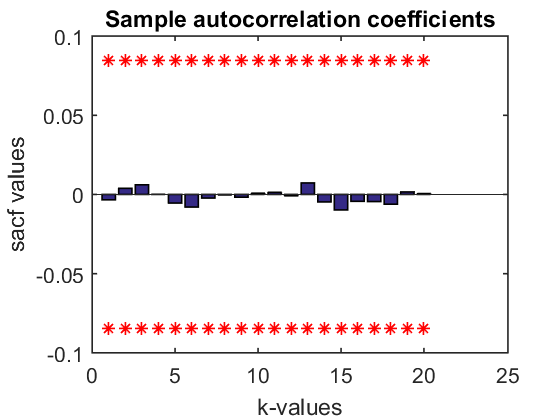

In [9]:
acf=sacf(pcsp,20);

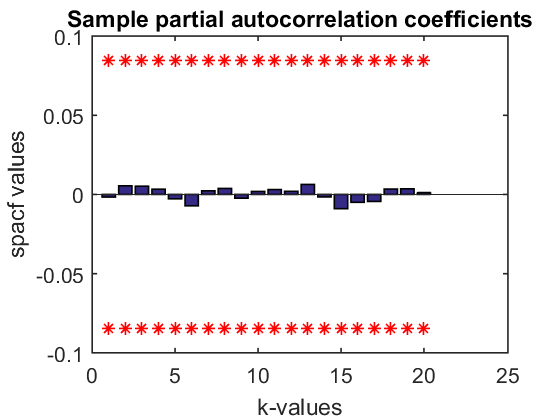

In [10]:
pacf=spacf(pcsp,20);

On ne remarque pas d'autoccorélation pour cette série

Pour div:

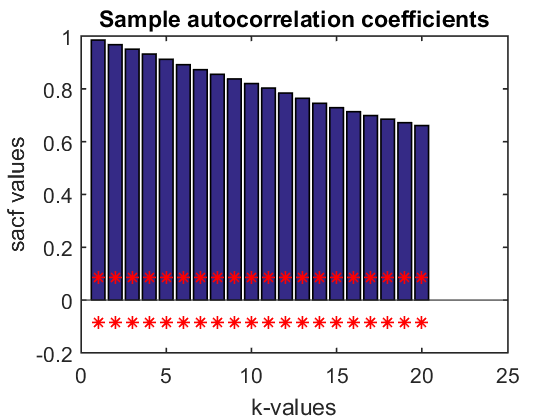

In [11]:
acf=sacf(div,20);

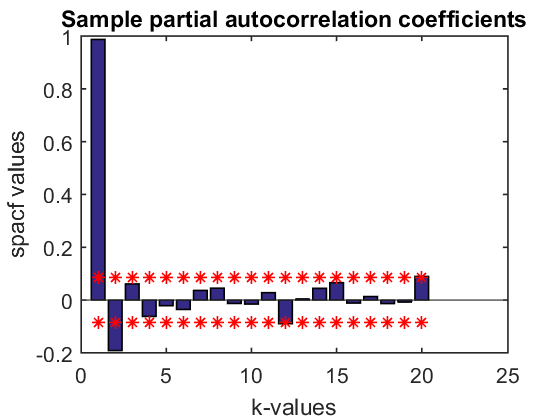

In [12]:
pacf=spacf(div,20);

Nous avons une autocorrélation d'ordre 1 et 2

L'autocorrélation quantifie l’influence linéaire du décalage temporel entre deux observations
du processus par un calcul classique de corrélation alors que l'autocorrélation partielle permet de connaître l’influence exacte d’une observation passée sur la valeur courante du processus en ôtant de l’étude toutes les observations intermédiaires

### Question 5

On test AR(1):

In [10]:
res = ar(div,1);
res.sige;
AIC1 = log((res.sige)^2)+2*1/n
BIC1 = log((res.sige)^2) + log(n) * 1 /n

AIC1 =

   -7.2179


BIC1 =

   -7.2101


On teste AR(2):

In [11]:
res2 = ar(div,2);
AIC2 = log((res2.sige)^2)+2*2/n
BIC2 = log((res2.sige)^2) + log(n) * 2 /n

AIC2 =

   -7.3038


BIC2 =

   -7.2882


On test AR(5)

In [12]:
res5 = ar(div,5);
AIC5 = log((res5.sige)^2)+2*5/n
BIC5 = log((res5.sige)^2) + log(n) * 5 /n

AIC5 =

   -7.3180


BIC5 =

   -7.2791


Si on se fie au BIC qui pénalise les modèles compliqués, c'est le modèle AR(2) qui serait le bon.

### Question 6

In [40]:
Tplus1 = [1,div(n),div(n-1)]*res2.beta 

Tplus1 =

    2.8475


In [42]:
Tplus2 = [1,Tplus1,div(n)]*res2.beta 

Tplus2 =

    2.8677


In [43]:
Tplus3 = [1,Tplus2,Tplus1]*res2.beta 

Tplus3 =

    2.8861


On calcul l'erreur pour une prévision à t+1:

In [68]:
[n,p] = size(div);
prev_div = ones(n,1);

for k=3:n 

    prev_div(k) = [1,div(k-1),div(k-2)]*res2.beta;
    
end

S = 0;

for i=3:n
    
    S = S + (div(i) - prev_div(i))^2;
    
end

RMSE = S*(1/(n-3))

RMSE =

    0.0258


On calcul l'erreur pour une prévision à t+2:

In [70]:
[n,p] = size(div);
prev_div = ones(n,1);

for k=4:n 
    
    temp = [1,div(k-2),div(k-3)]*res2.beta;
    prev_div(k) = [1,temp,div(k-2)]*res2.beta;
    
end

S = 0;

for i=4:n
    
    S = S + (div(i) - prev_div(i))^2;
    
end

RMSE = S*(1/(n-4))

RMSE =

    0.0642


On calcul l'erreur de prévision à t+3:

In [71]:
[n,p] = size(div);
prev_div = ones(n,1);

for k=5:n 
    
    temp1 = [1,div(k-3),div(k-4)]*res2.beta;
    temp2 = [1,temp1,div(k-3)]*res2.beta;
    prev_div(k) = [1,temp2,temp1]*res2.beta;
    
end

S = 0;

for i=5:n
    
    S = S + (div(i) - prev_div(i))^2;
    
end

RMSE = S*(1/(n-5))

RMSE =

    0.0991


## Modèle VAR

Nous n'avons pas vu se modèle en cours. Nous avons tout de même tenté de répondre aux questions.

![VAR](img/VAR.jpg)